(A) Getting the MINIST fashion dataset and splitting into training, validation and test sets


In [1]:
import tensorflow as tf
from tensorflow import keras

keras.__version__ #fixme: why the version could not show?
tf.__version__



'2.5.0'

In [2]:
fashion_minst = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_minst.load_data()

print(X_train_full.shape)

(60000, 28, 28)


In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_valid.shape)

(5000, 28, 28)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(class_names[y_train[0]])

Coat


(B) Showing an image

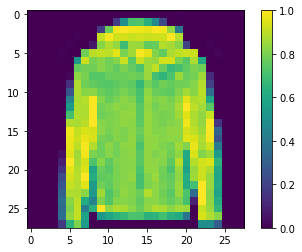

In [6]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

(C) Building the model

In [7]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


(D) Compile the model

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics='accuracy'
)

(E) Training the model

In [13]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7294 - accuracy: 0.7604 - val_loss: 0.5331 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4882 - accuracy: 0.8293 - val_loss: 0.4435 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4414 - accuracy: 0.8446 - val_loss: 0.4452 - val_accuracy: 0.8382
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4149 - accuracy: 0.8543 - val_loss: 0.3919 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3947 - accuracy: 0.8619 - val_loss: 0.3872 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3784 - accuracy: 0.8662 - val_loss: 0.3651 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3646 - accuracy: 0.8717 - val_loss: 0.3718 - val_accuracy:

(F) Plotting the Learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


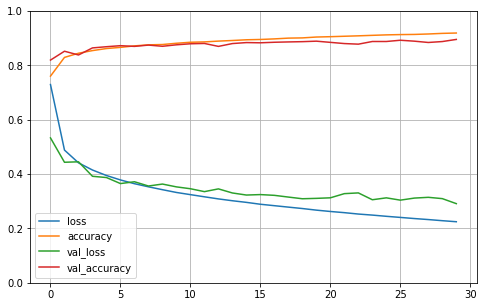

In [19]:
print(history.history.keys())

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #set the vertical range to [0-1]
plt.show()


(G) Evaluation

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 68.1440 - accuracy: 0.8385


[68.14398193359375, 0.8385000228881836]